<a href="https://colab.research.google.com/github/SHAZAN01/Data_Analysis/blob/main/Pandas_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

References:

https://www.machinelearningplus.com/python/101-pandas-exercises-python/

Groupby function Reference

https://www.analyticsvidhya.com/blog/2020/03/groupby-pandas-aggregating-data-python/


**Handling Missing Data**

Missing data is a common occurrence in many data analysis applications. One of the panda's objectives is to make working with missing data as easy as possible. For example, all descriptive statistics on pandas objects by default remove missing data.

The way missing data is represented in pandas objects is slightly inefficient, yet it serves many users well. Pandas employs the floating-point value NaN (Not a Number) to indicate missing data in numeric data. This is referred to be an easily detectable **sentinel** value:

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
a = pd.Series(['Tesla', 'Tata', np.nan, 'audi'])
a

In [ ]:
# To check null value status
a.isnull()

In [ ]:
# The built-in Python None value is also treated as NA in object arrays:
# a[1] = None
a

In [ ]:
a.isnull()

In [ ]:
from numpy import nan as NA
data = pd.Series([10, NA, 30, NA, 40,50,NA])
data

In [ ]:
# Drop rows with minimum one NaN value
data.dropna()

In [ ]:
# Alternative
data[data.notnull()]

**DataFrame operation**

In [ ]:
data = pd.DataFrame([[1., 2., 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
data

In [ ]:
# Drops enitre row having minimum one NA value
cleaned = data.dropna()
cleaned

In [ ]:
# Drop rows with all as NaN values
data.dropna(how='all') #does not update data
data

In [ ]:
data.dropna(how='all',inplace=True) #updates the data
# data= data.dropna(how='all') #updates the data
data

In [ ]:
# Create a column with NA as value
data[3]=NA
data

So far, we dropped rows having NaN values.
To drop columns in the same way, pass axis=1

In [ ]:
data.dropna(axis=1, how='all')

**Another example**

In [ ]:
df = pd.DataFrame(np.random.randn(7, 5))
df

Only selected datapoints can be made as NA using below method

In [ ]:
# Make first four values of column1 as Nan
df.iloc[:4,1] = NA
df.iloc[:2, 2] = NA
df

**thresh** parameter value decides the minimum number of non-NAN values needed in a "ROW" not to drop.

In [ ]:
df.dropna(thresh=4)

In [ ]:
df.dropna()
df

Its not encouraged to drop the data having NA all the time as we might lose major contributing data values in the same rows/columns. Hence, filling the NA with some constant metric is preferrable.

Calling fillna with a constant replaces missing values with that value:

In [ ]:
df.fillna(0)

Calling fillna with a dict, you can use a different fill value for each column

In [ ]:
df.fillna({1: 10, 2: 20})

In [ ]:
data.duplicated()

**Transforming Data Using a Function or Mapping**

In [ ]:
import pandas as pd

In [ ]:
data = pd.DataFrame({'birds': ['crow', 'owl', 'peacock','sparrow', 'pigeon', 'hawk',
'vulture', 'ostritch', 'parrot'],'lifespan': [10, 9, 20, 3, 15, 20, 10, 50, 50]})

data

,birds,lifespan
0,crow,10
1,owl,9
2,peacock,20
3,sparrow,3
4,pigeon,15
5,hawk,20
6,vulture,10
7,ostritch,50
8,parrot,50


In [ ]:
company_to_ceo = {
'google': 'sunder pichai',
'apple': 'tim cook',
'tesla': 'elon musk',
'microsoft': 'satya nadella',
'meta': 'mark zuckerberg',
'amazon': 'andy jassy'
}

In [ ]:
lowercased = data['birds'].str.lower()
lowercased

0        crow
1         owl
2     peacock
3     sparrow
4      pigeon
5        hawk
6     vulture
7    ostritch
8      parrot
Name: birds, dtype: object

In [ ]:
data['ceo'] = lowercased.map(company_to_ceo)
data

,birds,lifespan,ceo
0,crow,10,NaN
1,owl,9,NaN
2,peacock,20,NaN
3,sparrow,3,NaN
4,pigeon,15,NaN
5,hawk,20,NaN
6,vulture,10,NaN
7,ostritch,50,NaN
8,parrot,50,NaN


In [ ]:
# Alternative
data['birds'].map(lambda x: company_to_ceo[x.lower()])

KeyError: ignored

In [ ]:
# To make operations like rename on columns
data.rename( columns=str.upper)

,BIRDS,LIFESPAN,CEO
0,crow,10,NaN
1,owl,9,NaN
2,peacock,20,NaN
3,sparrow,3,NaN
4,pigeon,15,NaN
5,hawk,20,NaN
6,vulture,10,NaN
7,ostritch,50,NaN
8,parrot,50,NaN


**Data Replacing**

Filling in missing data with the fillna method is a special case of more general value
replacement. As you’ve already seen, map can be used to modify a subset of values in
an object but replace provides a simpler and more flexible way to do so

In [ ]:
data = pd.DataFrame([[1., 2., 3.], [1., 'NA', 'NA'], ['NA', 'NA', 'NA'], ['NA', 6.5, 3.]])
data

,0,1,2
0,1.0,2.0,3.0
1,1.0,NA,NA
2,NA,NA,NA
3,NA,6.5,3.0


In [ ]:
data.replace('NA', 0)

,0,1,2
0,1.0,2.0,3.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,6.5,3.0


In [ ]:
data.replace(['NA', 1], [0, 10])

,0,1,2
0,10,2.0,3.0
1,10,0.0,0.0
2,0,0.0,0.0
3,0,6.5,3.0


**Categorical Data**

Converting a categorical variable into a "dummy" or "indicator" matrix is another sort of transformation for statistical modelling or machine learning applications.



**Approach 1:**

**Dummy Variables-**

If a DataFrame column had k distinct values, you'd get a matrix or DataFrame with k columns containing only 1s and 0s. Pandas includes a get dummies method for this, but creating your own is not difficult.

In [ ]:
df = pd.DataFrame({'Bikes': ['Bike1', 'Bike2', 'Bike3', 'Bike4', 'Bike5', 'Bike6'],'gears': range(6)})
df

,Bikes,gears
0,Bike1,0
1,Bike2,1
2,Bike3,2
3,Bike4,3
4,Bike5,4
5,Bike6,5


In [ ]:
pd.get_dummies(df['Bikes'])

,Bike1,Bike2,Bike3,Bike4,Bike5,Bike6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


In [ ]:
# "prefix" parameter string value gets joined to the column names
dummies = pd.get_dummies(df['Bikes'], prefix='Bikes')
dummies

,Bikes_Bike1,Bikes_Bike2,Bikes_Bike3,Bikes_Bike4,Bikes_Bike5,Bikes_Bike6
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,0,0,1,0,0
4,0,0,0,0,1,0
5,0,0,0,0,0,1


In [ ]:
df_with_dummy = df[['gears']].join(dummies)
df_with_dummy

,gears,Bikes_Bike1,Bikes_Bike2,Bikes_Bike3,Bikes_Bike4,Bikes_Bike5,Bikes_Bike6
0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0
2,2,0,0,1,0,0,0
3,3,0,0,0,1,0,0
4,4,0,0,0,0,1,0
5,5,0,0,0,0,0,1


**Example 2**

In [ ]:
data = pd.read_csv("/content/employee_data.csv")

In [ ]:
data.head(20)

Checking the Labels in the column

In [ ]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
data['Remarks'].unique()

array(['Nice', 'Good', 'Great'], dtype=object)

Checking Count of each label

In [ ]:
data['Gender'].value_counts()

Female    7
Male      5
Name: Gender, dtype: int64

In [ ]:
data['Remarks'].value_counts()

Nice     5
Great    4
Good     3
Name: Remarks, dtype: int64

Binary Labelling with **1** at position where the label is present else **0**

In [ ]:
onehot_encoded_data = pd.get_dummies(data, columns=['Remarks', 'Gender'])

In [ ]:
onehot_encoded_data

,Emploee_ID,Remarks_Good,Remarks_Great,Remarks_Nice,Gender_Female,Gender_Male
0,45,0,0,1,0,1
1,78,1,0,0,1,0
2,56,0,1,0,1,0
3,12,0,1,0,0,1
4,7,0,0,1,1,0
5,68,0,1,0,1,0
6,23,1,0,0,0,1
7,45,0,0,1,1,0
8,89,0,1,0,0,1
9,75,0,0,1,1,0


**Approach - 2**

**Label Encoder**


Label Encoder encodes labels with value between **0** and **number_of_class - 1**

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [ ]:
label_encoded_data = labelencoder_X.fit_transform(data['Remarks'])

In [ ]:
label_encoded_data = pd.DataFrame(data = label_encoded_data, columns = ['Remarks'])

In [ ]:
label_encoded_data['Remarks'].unique()

array([2, 0, 1], dtype=int64)

In [ ]:
label_encoded_data

,Remarks
0,2
1,0
2,1
3,1
4,2
5,1
6,0
7,2
8,1
9,2


Data contained in pandas objects can be combined together in a number of ways:


*   **pandas.merge** connects rows in DataFrames based on one or more keys.
*   **pandas.concat** concatenates or “stacks” together objects along an axis.

In [ ]:
df1 = pd.DataFrame({'Bikes': ['Bike2', 'Bike2', 'Bike1', 'Bike3', 'Bike1', 'Bike1','Bike2'],'gears1': range(7)})
df2 = pd.DataFrame({'Bikes': ['Bike1', 'Bike2', 'Bike4'],'gears2': range(3)})

In [ ]:
df2

,Bikes,gears
0,Bike1,0
1,Bike2,1
2,Bike3,2


In [ ]:
pd.merge(df1, df2)

,Bikes,gears1,gears2
0,Bike2,0,1
1,Bike2,1,1
2,Bike2,6,1
3,Bike1,2,0
4,Bike1,4,0
5,Bike1,5,0


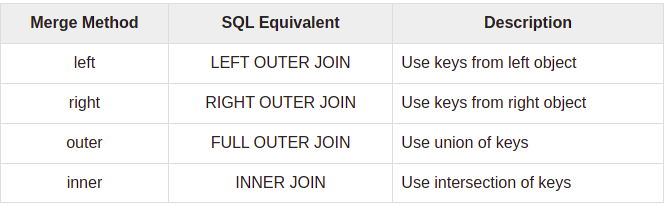

**concat**

In [ ]:
s1 = pd.Series([0, 1], index=['a', 'b'])
s2 = pd.Series([2, 3, 4], index=['c', 'd', 'e'])
s3 = pd.Series([5, 6], index=['f', 'g'])

In [ ]:
pd.concat([s1, s2, s3])

a    0
b    1
c    2
d    3
e    4
f    5
g    6
dtype: int64

By default concat works along axis=0 , producing another Series. If you pass axis=1 ,
the result will instead be a DataFrame ( axis=1 is the columns):

In [ ]:
pd.concat([s1, s2, s3], axis=1)

,0,1,2
a,0.0,NaN,NaN
b,1.0,NaN,NaN
c,NaN,2.0,NaN
d,NaN,3.0,NaN
e,NaN,4.0,NaN
f,NaN,NaN,5.0
g,NaN,NaN,6.0


In [ ]:
s4 = pd.concat([s1, s3])
s4

a    0
b    1
f    5
g    6
dtype: int64

In [ ]:
left_alignment = "Left Text"
center_alignment = "Centered Text"
right_alignment = "Right Text"

# printing out aligned text
# print(f"{left_alignment : <20}{center_alignment : ^15}{right_alignment : >20}")
# print(f"{:*<20}")

In [ ]:
myString = "Scaler"
myStr = f"Padded String with string on left and length 20 is: {'Scaler':*<20}"
myStr = f"Padded String with string on left and length 20 is: {'Scaler':*>20}"
myStr = f"Padded String with string on left and length 20 is: {'Scaler':*^20}"

myStr = f"Padded String with string on left and length 20 is: {'Scaler':0^20}"
print(myStr)


Padded String with string on left and length 20 is: 0000000Scaler0000000
